In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load the data
df = pd.read_csv('pet_adoption_data.csv')

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [ ]:
# Display the first 5 rows
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [ ]:
# Check for missing values
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [ ]:
# Display summary
df.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [ ]:
# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in PetType:
PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

Unique values in Breed:
Breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64

Unique values in Color:
Color
White     420
Orange    409
Gray      400
Black     395
Brown     383
Name: count, dtype: int64

Unique values in Size:
Size
Medium    714
Small     663
Large     630
Name: count, dtype: int64


In [ ]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['PetType', 'Breed', 'Color', 'Size']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Separate features and target
X = df.drop('AdoptionLikelihood', axis=1)
y = df['AdoptionLikelihood']

In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(1605, 12)

In [ ]:
X_test.shape

(402, 12)

# Data Visualization

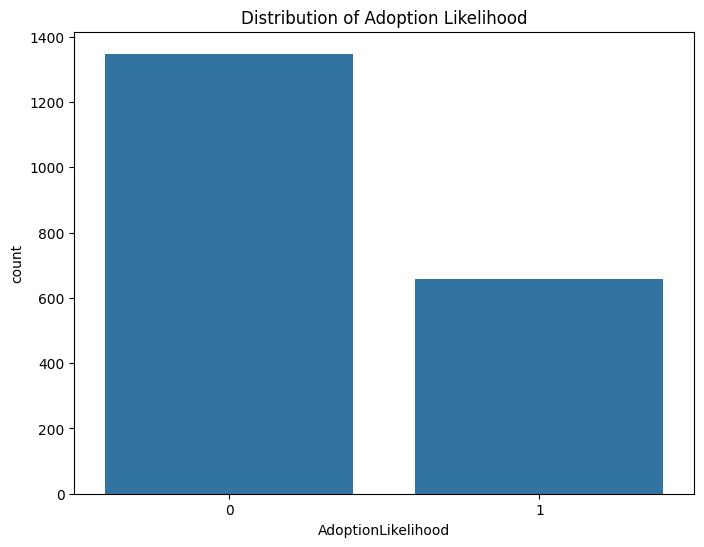

In [ ]:
# Distribution of adoption likelihood
plt.figure(figsize=(8, 6))
sns.countplot(x='AdoptionLikelihood', data=df)
plt.title('Distribution of Adoption Likelihood')
plt.show()

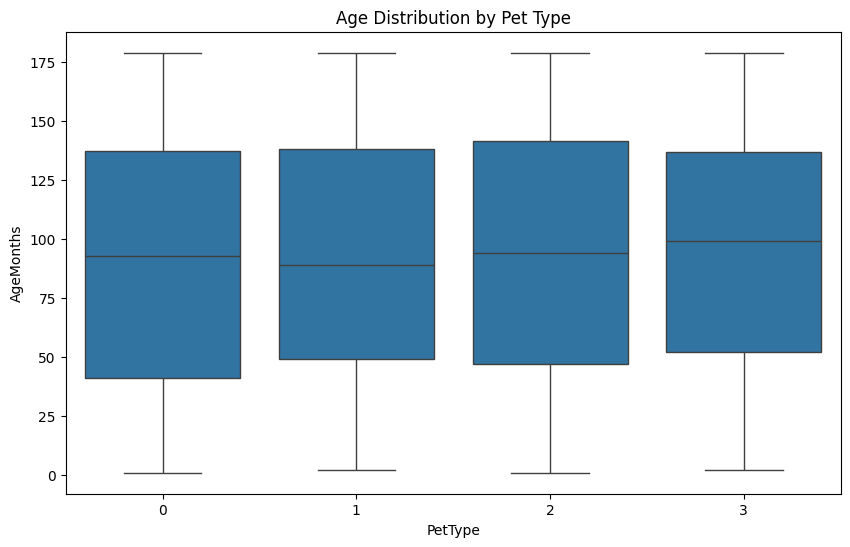

In [ ]:
# Age distribution by pet type
plt.figure(figsize=(10, 6))
sns.boxplot(x='PetType', y='AgeMonths', data=df)
plt.title('Age Distribution by Pet Type')
plt.show()

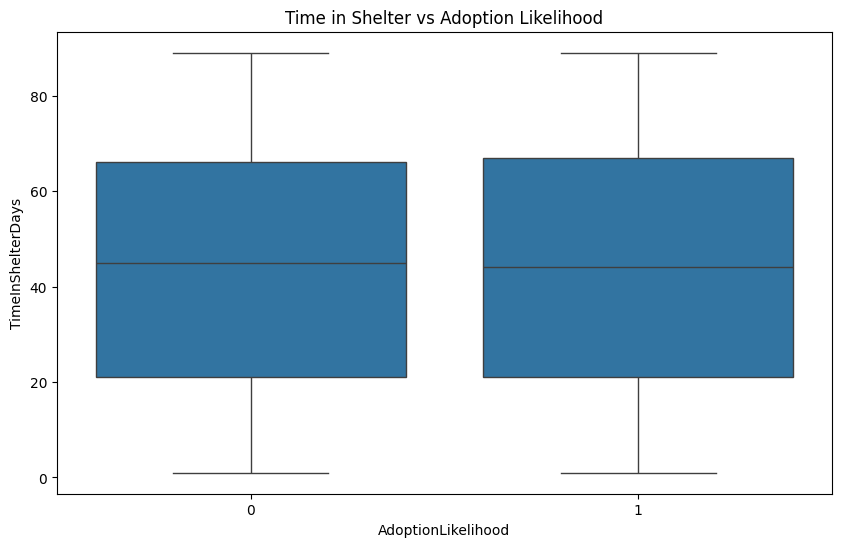

In [ ]:
# Time in shelter vs Adoption Likelihood
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptionLikelihood', y='TimeInShelterDays', data=df)
plt.title('Time in Shelter vs Adoption Likelihood')
plt.show()

# Model Training, Testing and Evaluation

In [ ]:
# Initialization and training the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9203980099502488

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       270
           1       0.88      0.88      0.88       132

    accuracy                           0.92       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.92      0.92      0.92       402


Confusion Matrix:
[[254  16]
 [ 16 116]]


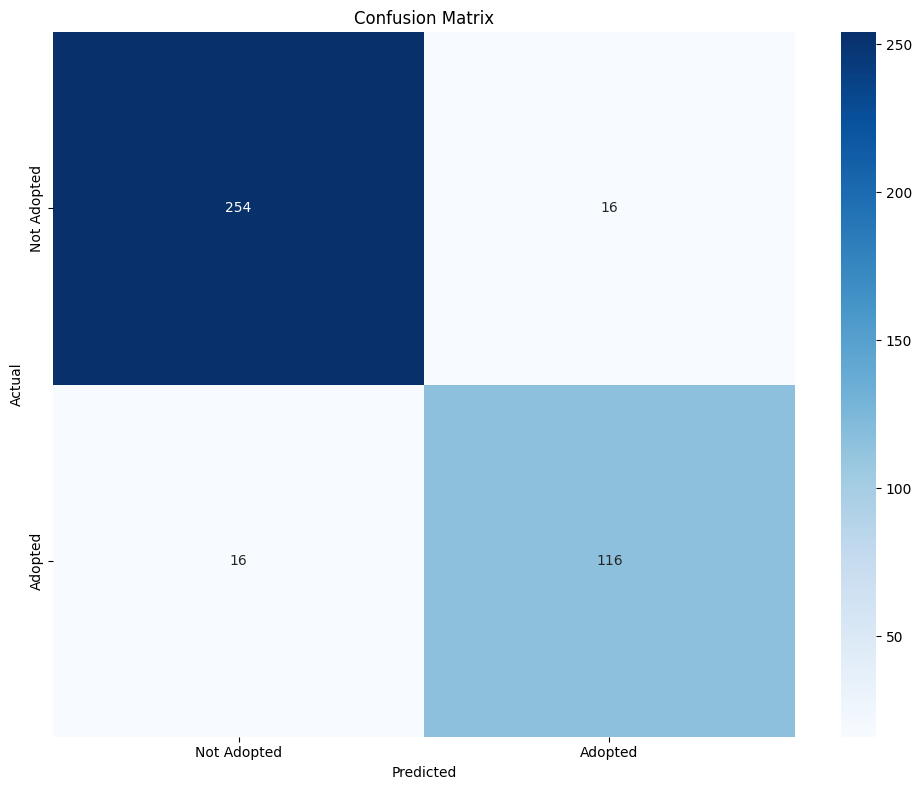

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# text labels
labels = ['Not Adopted', 'Adopted']
tick_marks = np.arange(len(labels)) + 0.5
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

plt.tight_layout()
plt.show()